In [2]:
!pip install numpy
!pip install cvxpy

In [3]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt


The optimal value is -4.341674835696109
A solution x is
[ 0.86540763 -2.3015387 ]


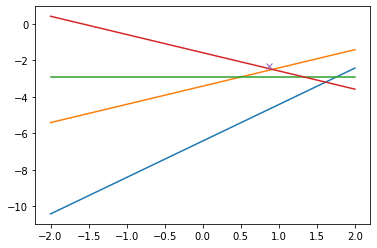

In [4]:
#2-d cases fix for the previous plots:
# Generate a random non-trivial linear program.
#2-d cases fix for the previous plots:
# Generate a random non-trivial linear program.
# tol = 1e-15
m = 4
n = 2
np.random.seed(1)
s0 = np.random.randn(m)
lamb0 = np.maximum(-s0, 0)
s0 = np.maximum(s0, 0)
x0 = np.random.randn(n)
A = np.random.randn(m, n)
b = A @ x0 + s0
c = -A.T @ lamb0

# Define and solve the CVXPY problem.
x = cp.Variable(n)
prob = cp.Problem(cp.Minimize(c.T@x),
                 [A @ x <= b])
#prob.solve(feastol=tol, reltol=tol, abstol=tol, verbose=True)
prob.solve()

# Print result.
print("\nThe optimal value is", prob.value)
print("A solution x is")
print(x.value)

lin = np.linspace(-2,2,100)
y = []
for i in range(m):
  y.append(-A[i,0]//A[i,1]*lin + b[i]/A[i,1])
  plt.plot(lin, y[i])

plt.plot(x.value[0],x.value[1],'x') 

plt.show()


Definition 1: Polyhedron

A polyhedron is a convex set of the form $\{\mathbf{x} \in \mathbb{R}^n | \mathbf{Ax} \geq \mathbf{b}\}$ where $\mathbf{A}$ is an $m \times n$ matrix and $\mathbf{b}$ is a vector in $\mathbb{R}^m$.


We can see how that closely relates to a linear program, as all linear programs can be expressed with the constraints in the form $\mathbf{Ax} \geq \mathbf{b}$.

One thing we saw earlier was that the optimal solution always ends up in a "corner" of the constraint set. We can define this in two different ways.

Definition 2: Extreme point


Suppose $P\subset \mathbb{R}^n$ is a convex set. $\mathbf{x} \in P$ is an extreme point if $\nexists \mathbf{y, z} \in P, \lambda \in [0, 1]$ such that $\mathbf{y, z} \neq \mathbf{x}, \mathbf{x}=\lambda\mathbf{y}+(1-\lambda)\mathbf{z}$


Definition 3: Vertex


Suppose $P\subset \mathbb{R}^n$ is a convex set. $\mathbf{x} \in P$ is a vertex if $\exists \mathbf{c}$ such that $\mathbf{y} \neq \mathbf{x}, \mathbf{c^Tx} < \mathbf{c^Ty} \quad \forall \mathbf{y} \in P$


In [5]:
import jax
import jax.numpy as jnp

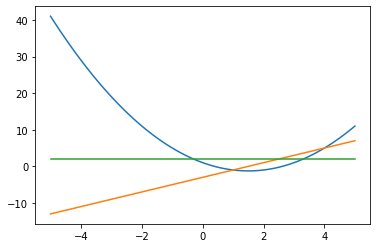

In [6]:
f = lambda x: x**2 - 3*x + 1

x = jnp.linspace(-5, 5, 100)

dfdx = jax.grad(f)
df2dx = jax.grad(dfdx)

plt.plot(x, list(map(f,x)))
plt.plot(x, list(map(dfdx,x)))
plt.plot(x, list(map(df2dx,x)))
plt.show()


#Convexity and Hessians

If a function is twice differentiable, we have an easier way to determine if a function is convex. First, let us define the Hessian.

$$\nabla f(\mathbf{x}) = \begin{bmatrix} \frac{\partial f}{\partial x_1} \\ \vdots \\ \frac{\partial f}{\partial x_n} \end{bmatrix}$$\\
$$H(\mathbf{x}) = \nabla(\nabla f(\mathbf{x})) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & ... & \frac{\partial^2 f}{\partial x_1x_n} \\ \vdots & \ddots & \vdots \\ \frac{\partial^2 f}{\partial x_nx_1} & ... & \frac{\partial^2 f}{\partial x_n^2} \end{bmatrix}$$

Note that the Hessian is always symmetric.

A property of the Hessian is that $f(\mathbf{x})$ is convex if and only if $\mathbf{y}^TH(\mathbf{x})\mathbf{y} \geq 0,\forall \mathbf{x, y} \neq \mathbf{0} \in \mathbb{R}^n$. One way to show that this is true is to show that all the eigenvalues are positive.

Any symmetric matrix with this property is called positive definite.

# Showing the L2 Norm is convex

In lecture, we spoke about how all norms are convex. In this lab, we will show one way to prove that the l-2 norm is convex. First we will show by hand, and then check the results with our code.


In [7]:
def hessian(f):
  return jax.jacfwd(jax.grad(f))

def f(x):
  return jnp.dot(x, x)

H = hessian(f)(jnp.array([1., 2., 3.]))
print(H)



[[2. 0. 0.]
 [0. 2. 0.]
 [0. 0. 2.]]


In [8]:
eig = jnp.linalg.eig(H)[0]
print(eig)

[2.+0.j 2.+0.j 2.+0.j]
